<a href="https://colab.research.google.com/github/AitaDiopToure/ApiGateway/blob/main/Whatsapp_chat_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import re

In [8]:
import pandas as pd

In [9]:
f = open('Discussion WhatsApp avec Master 2 Audit promo 2022.txt','r',encoding='utf-8')

In [10]:
data = f.read()

In [11]:
print (data)

16/07/2022, 10:53 - ‎+221 77 112 97 62 a créé le groupe "Master 2 Audit promo 2022"
16/07/2022, 10:53 - Vous avez été ajouté·e
12/06/2023, 20:41 - +221 78 157 83 16: Bjr, demain on fera cours de droit d’enregistrement à partir de 10h inchallah..
12/06/2023, 20:41 - +221 78 157 83 16: Le lien vous sera envoyé avant l’heure
12/06/2023, 20:42 - +221 77 164 18 39: Sur quelle plateforme ?
12/06/2023, 20:55 - +221 78 157 83 16: Je pense que ça sera sur Google meet…
C’est M.Fall qui envoie les liens.
13/06/2023, 09:50 - +221 77 219 26 45: Bonjour 
Le cours se fera sur la plateforme Zoom
13/06/2023, 09:55 - +221 77 522 73 91: Bonjour
Donc nous attendons le lien
13/06/2023, 10:05 - +221 77 483 73 17: bou 10h 30 dioté prof bi nieuwoul daniou teudatt d
13/06/2023, 10:05 - +221 78 206 22 81: Fouyyy
13/06/2023, 10:06 - +221 78 157 83 16: https://us02web.zoom.us/j/9247069774?pwd=S2t2UjkwbnJUV09LSjdnV0ltWjdYQT09
13/06/2023, 10:15 - +221 78 113 41 28: Gnew Len diangue 😂😂
13/06/2023, 10:15 - +221 78 11

In [12]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [13]:
messages = re.split(pattern, data)[1:]
messages

['\u200e+221 77 112 97 62 a créé le groupe "Master 2 Audit promo 2022"\n',
 'Vous avez été ajouté·e\n',
 '+221 78 157 83 16: Bjr, demain on fera cours de droit d’enregistrement à partir de 10h inchallah..\n',
 '+221 78 157 83 16: Le lien vous sera envoyé avant l’heure\n',
 '+221 77 164 18 39: Sur quelle plateforme ?\n',
 '+221 78 157 83 16: Je pense que ça sera sur Google meet…\nC’est M.Fall qui envoie les liens.\n',
 '+221 77 219 26 45: Bonjour \nLe cours se fera sur la plateforme Zoom\n',
 '+221 77 522 73 91: Bonjour\nDonc nous attendons le lien\n',
 '+221 77 483 73 17: bou 10h 30 dioté prof bi nieuwoul daniou teudatt d\n',
 '+221 78 206 22 81: Fouyyy\n',
 '+221 78 157 83 16: https://us02web.zoom.us/j/9247069774?pwd=S2t2UjkwbnJUV09LSjdnV0ltWjdYQT09\n',
 '+221 78 113 41 28: Gnew Len diangue 😂😂\n',
 '+221 78 113 41 28: Yewou Lene\n',
 '+221 77 304 65 29: Ah prof bi gneuwna ?\n',
 '+221 77 304 65 29: Bonjour\n',
 '+221 78 157 83 16: \u200eIMG-20230613-WA0024.jpg (fichier joint)\nDésacti

In [14]:
dates = re.findall(pattern, data)
dates

['16/07/2022, 10:53 - ',
 '16/07/2022, 10:53 - ',
 '12/06/2023, 20:41 - ',
 '12/06/2023, 20:41 - ',
 '12/06/2023, 20:42 - ',
 '12/06/2023, 20:55 - ',
 '13/06/2023, 09:50 - ',
 '13/06/2023, 09:55 - ',
 '13/06/2023, 10:05 - ',
 '13/06/2023, 10:05 - ',
 '13/06/2023, 10:06 - ',
 '13/06/2023, 10:15 - ',
 '13/06/2023, 10:15 - ',
 '13/06/2023, 10:16 - ',
 '13/06/2023, 10:16 - ',
 '13/06/2023, 10:35 - ',
 '13/06/2023, 10:39 - ',
 '13/06/2023, 10:49 - ',
 '13/06/2023, 10:50 - ',
 '13/06/2023, 10:51 - ',
 '13/06/2023, 15:57 - ',
 '13/06/2023, 22:41 - ',
 '13/06/2023, 22:41 - ',
 '14/06/2023, 09:27 - ',
 '14/06/2023, 10:07 - ',
 '14/06/2023, 10:12 - ',
 '14/06/2023, 11:40 - ',
 '14/06/2023, 11:43 - ',
 '14/06/2023, 11:43 - ',
 '14/06/2023, 13:34 - ',
 '14/06/2023, 14:16 - ',
 '14/06/2023, 14:19 - ',
 '14/06/2023, 14:21 - ',
 '14/06/2023, 14:23 - ',
 '14/06/2023, 14:23 - ',
 '14/06/2023, 16:08 - ',
 '14/06/2023, 16:08 - ',
 '15/06/2023, 00:09 - ',
 '15/06/2023, 00:09 - ',
 '15/06/2023, 00:09 - ',


In [16]:
df = pd.DataFrame({'user_message': messages, 'message_date': dates})
# convert message_date type
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%Y, %H:%M - ')

df.rename(columns={'message_date': 'date'}, inplace=True)

df.head()

,user_message,date
0,"‎+221 77 112 97 62 a créé le groupe ""Master 2 ...",2022-07-16 10:53:00
1,Vous avez été ajouté·e\n,2022-07-16 10:53:00
2,"+221 78 157 83 16: Bjr, demain on fera cours d...",2023-06-12 20:41:00
3,+221 78 157 83 16: Le lien vous sera envoyé av...,2023-06-12 20:41:00
4,+221 77 164 18 39: Sur quelle plateforme ?\n,2023-06-12 20:42:00


In [17]:
df.shape

(102, 2)

In [18]:
# separate users and messages
users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:  # user name
        users.append(entry[1])
        messages.append(" ".join(entry[2:]))
    else:
        users.append('group_notification')
        messages.append(entry[0])

df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)
df.head()

,date,user,message
0,2022-07-16 10:53:00,group_notification,"‎+221 77 112 97 62 a créé le groupe ""Master 2 ..."
1,2022-07-16 10:53:00,group_notification,Vous avez été ajouté·e\n
2,2023-06-12 20:41:00,+221 78 157 83 16,"Bjr, demain on fera cours de droit d’enregistr..."
3,2023-06-12 20:41:00,+221 78 157 83 16,Le lien vous sera envoyé avant l’heure\n
4,2023-06-12 20:42:00,+221 77 164 18 39,Sur quelle plateforme ?\n


In [19]:
df['date']

0     2022-07-16 10:53:00
1     2022-07-16 10:53:00
2     2023-06-12 20:41:00
3     2023-06-12 20:41:00
4     2023-06-12 20:42:00
              ...        
97    2023-06-20 16:12:00
98    2023-06-20 17:10:00
99    2023-06-20 17:37:00
100   2023-07-05 12:47:00
101   2023-07-05 13:26:00
Name: date, Length: 102, dtype: datetime64[ns]

In [20]:
df['only_date'] = df['date'].dt.date

In [21]:
df.head()

,date,user,message,only_date
0,2022-07-16 10:53:00,group_notification,"‎+221 77 112 97 62 a créé le groupe ""Master 2 ...",2022-07-16
1,2022-07-16 10:53:00,group_notification,Vous avez été ajouté·e\n,2022-07-16
2,2023-06-12 20:41:00,+221 78 157 83 16,"Bjr, demain on fera cours de droit d’enregistr...",2023-06-12
3,2023-06-12 20:41:00,+221 78 157 83 16,Le lien vous sera envoyé avant l’heure\n,2023-06-12
4,2023-06-12 20:42:00,+221 77 164 18 39,Sur quelle plateforme ?\n,2023-06-12


In [22]:
df['year'] = df['date'].dt.year

In [23]:
df.head()

,date,user,message,only_date,year
0,2022-07-16 10:53:00,group_notification,"‎+221 77 112 97 62 a créé le groupe ""Master 2 ...",2022-07-16,2022
1,2022-07-16 10:53:00,group_notification,Vous avez été ajouté·e\n,2022-07-16,2022
2,2023-06-12 20:41:00,+221 78 157 83 16,"Bjr, demain on fera cours de droit d’enregistr...",2023-06-12,2023
3,2023-06-12 20:41:00,+221 78 157 83 16,Le lien vous sera envoyé avant l’heure\n,2023-06-12,2023
4,2023-06-12 20:42:00,+221 77 164 18 39,Sur quelle plateforme ?\n,2023-06-12,2023


In [24]:
df['month_num'] = df['date'].dt.month
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['day_name'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df.head()

,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute
0,2022-07-16 10:53:00,group_notification,"‎+221 77 112 97 62 a créé le groupe ""Master 2 ...",2022-07-16,2022,7,July,16,Saturday,10,53
1,2022-07-16 10:53:00,group_notification,Vous avez été ajouté·e\n,2022-07-16,2022,7,July,16,Saturday,10,53
2,2023-06-12 20:41:00,+221 78 157 83 16,"Bjr, demain on fera cours de droit d’enregistr...",2023-06-12,2023,6,June,12,Monday,20,41
3,2023-06-12 20:41:00,+221 78 157 83 16,Le lien vous sera envoyé avant l’heure\n,2023-06-12,2023,6,June,12,Monday,20,41
4,2023-06-12 20:42:00,+221 77 164 18 39,Sur quelle plateforme ?\n,2023-06-12,2023,6,June,12,Monday,20,42


In [25]:
df[df['user'] == 'Daouda Samba Kirene'].shape

(0, 11)

In [26]:
words = []
for message in df['message']:
    words.extend(message.split())

In [27]:
len(words)

787

In [28]:
!pip install urlextract

In [29]:
from urlextract import URLExtract
extract = URLExtract()
urls = extract.find_urls("Let's have URL stackoverflow.com as an example google.com, http://facebook.com, ftp://urL.in ")
urls

['stackoverflow.com', 'google.com', 'http://facebook.com', 'ftp://urL.in']

In [30]:
links = []
for message in df['message']:
  links.extend(extract.find_urls(message))

In [31]:
len(links)

3

In [32]:
df

,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute
0,2022-07-16 10:53:00,group_notification,"‎+221 77 112 97 62 a créé le groupe ""Master 2 ...",2022-07-16,2022,7,July,16,Saturday,10,53
1,2022-07-16 10:53:00,group_notification,Vous avez été ajouté·e\n,2022-07-16,2022,7,July,16,Saturday,10,53
2,2023-06-12 20:41:00,+221 78 157 83 16,"Bjr, demain on fera cours de droit d’enregistr...",2023-06-12,2023,6,June,12,Monday,20,41
3,2023-06-12 20:41:00,+221 78 157 83 16,Le lien vous sera envoyé avant l’heure\n,2023-06-12,2023,6,June,12,Monday,20,41
4,2023-06-12 20:42:00,+221 77 164 18 39,Sur quelle plateforme ?\n,2023-06-12,2023,6,June,12,Monday,20,42
...,...,...,...,...,...,...,...,...,...,...,...
97,2023-06-20 16:12:00,+221 77 219 26 45,😂😂 xana\n,2023-06-20,2023,6,June,20,Tuesday,16,12
98,2023-06-20 17:10:00,+221 77 164 18 39,Sa vote compéwoul dieul naa ndam lii\n@2217815...,2023-06-20,2023,6,June,20,Tuesday,17,10
99,2023-06-20 17:37:00,+221 77 219 26 45,😂😂\n,2023-06-20,2023,6,June,20,Tuesday,17,37
100,2023-07-05 12:47:00,+221 78 157 83 16,Dewenaty balen ma akh balnala yalla naniou yal...,2023-07-05,2023,7,July,5,Wednesday,12,47


In [33]:
x = df['user'].value_counts().head()

In [34]:
import matplotlib.pyplot as plt

In [35]:
name = x.index
count = x.values

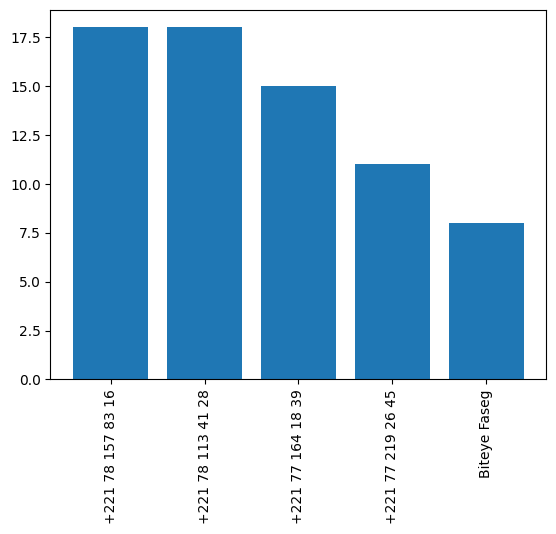

In [36]:
plt.bar(name,count)
plt.xticks(rotation ='vertical')
plt.show()

In [38]:
round((df['user'].value_counts() / df.shape[0]) * 100, 2).reset_index().rename( columns={'index': 'name', 'user': 'percent'})

,name,percent
0,+221 78 157 83 16,17.65
1,+221 78 113 41 28,17.65
2,+221 77 164 18 39,14.71
3,+221 77 219 26 45,10.78
4,Biteye Faseg,7.84
5,+221 78 582 35 72,5.88
6,+221 77 483 73 17,4.90
7,Lamine Camara Faseg,4.90
8,+221 77 522 73 91,2.94
9,+221 77 304 65 29,2.94


In [43]:
temp = df[df['user'] != 'group_notification']
temp = temp[temp['message'] != '<Media omitted>\n']


In [50]:
f = open('stop_hinglish.txt', 'r')
stop_words = f.read()
print(stop_words)

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [48]:
words = []

for message in temp['message']:
        for word in message.lower().split():
            if word not in stop_words:
                words.append(word)

In [41]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,de,20
1,(fichier,14
2,joint),14
3,la,12
4,le,10
5,😂😂,10
6,à,9
7,cours,8
8,bi,8
9,du,8


In [51]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.6/356.6 kB 24.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.6.0-py2.py3-none-any.whl size=351311 sha256=4e7a930a7b18ba41484b9c385adae2f48a4b4538c5deef21ab4221e77adcaa35
  Stored in directory: /root/.cache/pip/wheels/ea/0b/64/114bc939d0083621aa41521e21be246c888260b8aa21e6c1ad
Successfully built emoji


In [59]:
import emoji

In [56]:
!pip install --upgrade emoji


In [61]:
emojis = []
pattern = re.compile("["
                     u"\U0001F600-\U0001F64F"  # emoticons
                     u"\U0001F300-\U0001F5FF"  # symboles & pictogrammes
                     u"\U0001F680-\U0001F6FF"  # transport & symboles de cartes
                     u"\U0001F1E0-\U0001F1FF"  # drapeaux (drapeaux emoji)
                     u"\U00002702-\U000027B0"  # Dingbats
                     u"\U000024C2-\U0001F251"
                     "]+", flags=re.UNICODE)

for message in df['message']:
    emojis.extend(pattern.findall(message))

In [62]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,😂😂,14
1,😂,4
2,😂😂😂😂🙌🙌,1
3,😁😁,1
4,♂️😭,1
5,😂😂😂,1
6,🏿,1
7,🎊,1
8,🎉,1
9,🙏🏾,1


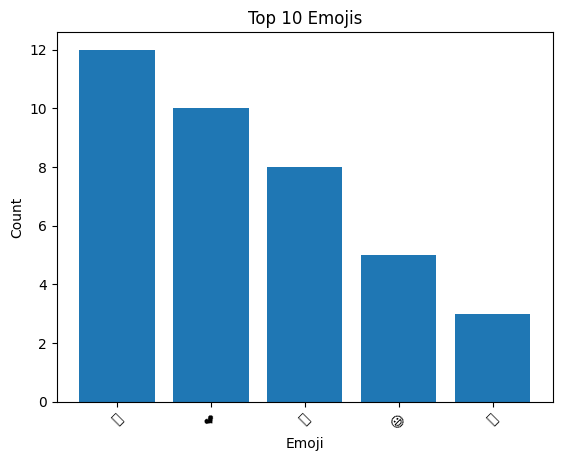

In [71]:
emoji_df_sorted = emoji_df.sort_values(by='Count', ascending=False)
top_emojis = emoji_df_sorted['Emoji'].head(10)
top_counts = emoji_df_sorted['Count'].head(10)
plt.bar(top_emojis, top_counts)
plt.xlabel('Emoji')
plt.ylabel('Count')
plt.title('Top 10 Emojis')
plt.xticks(rotation=45)
plt.show()



In [72]:
df['month_num'] = df['date'].dt.month

In [76]:
timeline = df.groupby(['year', 'month_num', 'month']).count()['message'].reset_index()

In [77]:
timeline

,year,month_num,month,message
0,2022,7,July,2
1,2023,6,June,98
2,2023,7,July,2


In [79]:
time = []
for i in range(timeline.shape[0]):
  time.append(timeline['month'][i] + " " + str(timeline['year'][i]))

In [80]:
timeline['time'] = time

In [81]:
timeline

,year,month_num,month,message,time
0,2022,7,July,2,July 2022
1,2023,6,June,98,June 2023
2,2023,7,July,2,July 2023


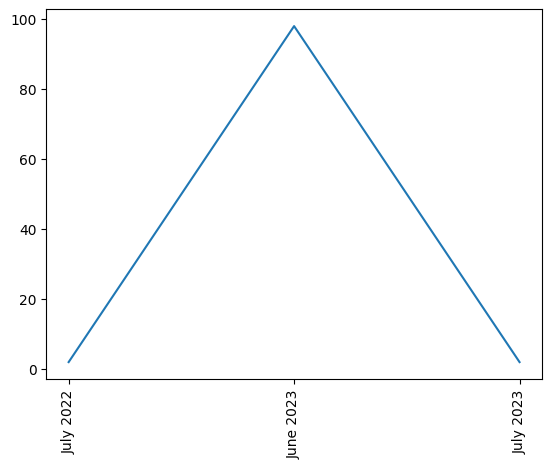

In [82]:
plt.plot(timeline['time'], timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [86]:
df['only_date'] = df['date'].dt.date

In [88]:
daily_timeline = df.groupby('only_date').count()['message'].reset_index()

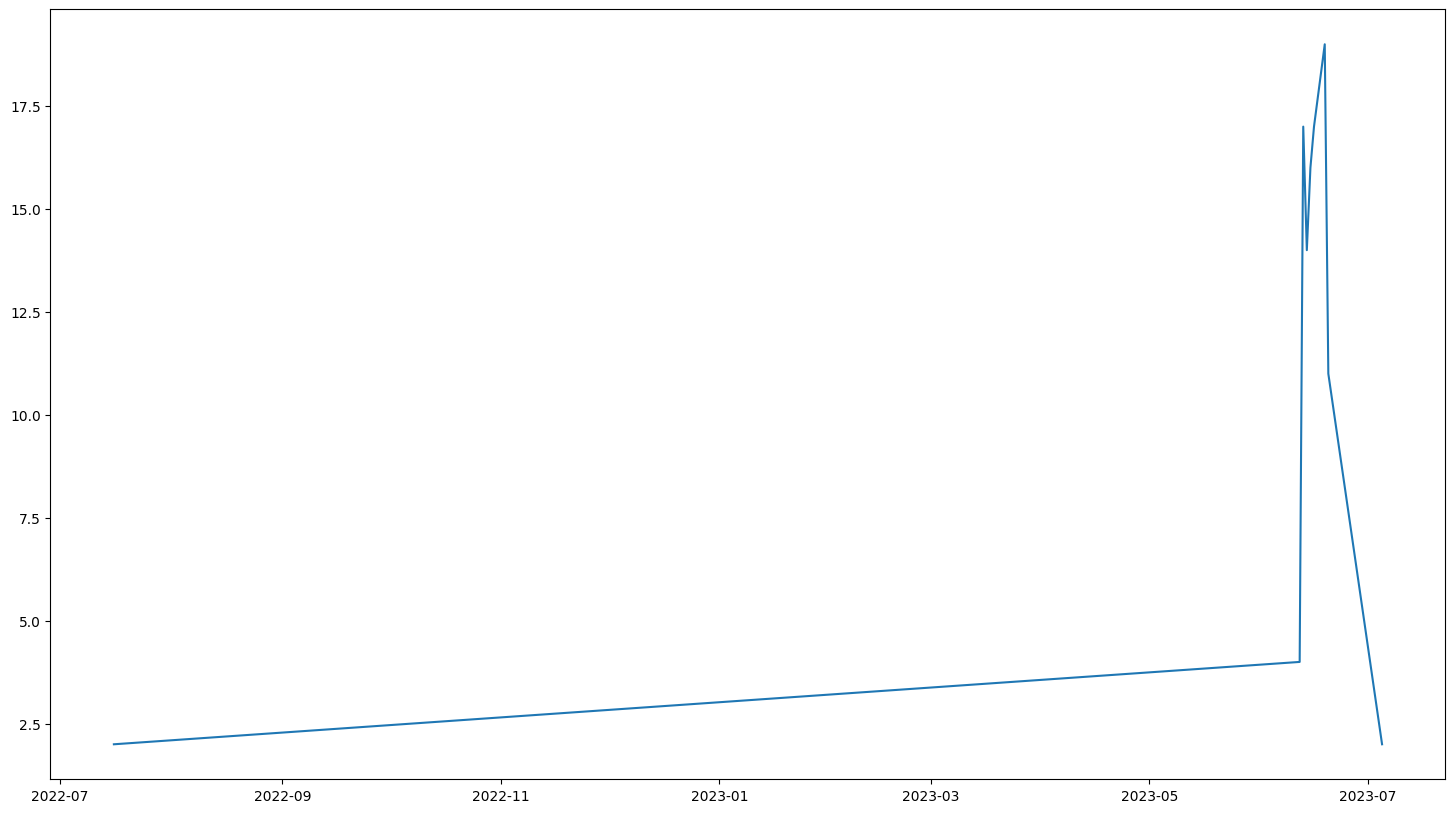

In [89]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only_date'],daily_timeline['message'])

In [90]:
df.head()

,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute
0,2022-07-16 10:53:00,group_notification,"‎+221 77 112 97 62 a créé le groupe ""Master 2 ...",2022-07-16,2022,7,July,16,Saturday,10,53
1,2022-07-16 10:53:00,group_notification,Vous avez été ajouté·e\n,2022-07-16,2022,7,July,16,Saturday,10,53
2,2023-06-12 20:41:00,+221 78 157 83 16,"Bjr, demain on fera cours de droit d’enregistr...",2023-06-12,2023,6,June,12,Monday,20,41
3,2023-06-12 20:41:00,+221 78 157 83 16,Le lien vous sera envoyé avant l’heure\n,2023-06-12,2023,6,June,12,Monday,20,41
4,2023-06-12 20:42:00,+221 77 164 18 39,Sur quelle plateforme ?\n,2023-06-12,2023,6,June,12,Monday,20,42


In [93]:
df['day_name']= df['date'].dt.day_name()

In [94]:
df['day_name'].value_counts()

Tuesday      28
Monday       23
Friday       17
Wednesday    16
Thursday     16
Saturday      2
Name: day_name, dtype: int64

In [95]:
period = []
for hour in df[['day_name', 'hour']]['hour']:
        if hour == 23:
            period.append(str(hour) + "-" + str('00'))
        elif hour == 0:
            period.append(str('00') + "-" + str(hour + 1))
        else:
            period.append(str(hour) + "-" + str(hour + 1))

In [96]:
df['period'] = period

In [97]:
df.sample(5)

,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute,period
69,2023-06-16 16:10:00,+221 78 582 35 72,Neko yorel nam plus 2\n,2023-06-16,2023,6,June,16,Friday,16,10,16-17
70,2023-06-19 23:14:00,+221 78 157 83 16,Bjr demain nous ferons droit d’enregistrement ...,2023-06-19,2023,6,June,19,Monday,23,14,23-00
15,2023-06-13 10:35:00,+221 78 157 83 16,‎IMG-20230613-WA0024.jpg (fichier joint)\nDésa...,2023-06-13,2023,6,June,13,Tuesday,10,35,10-11
13,2023-06-13 10:16:00,+221 77 304 65 29,Ah prof bi gneuwna ?\n,2023-06-13,2023,6,June,13,Tuesday,10,16,10-11
53,2023-06-16 09:01:00,+221 78 157 83 16,"Bonjour, nous ferons cours d’audit opérationne...",2023-06-16,2023,6,June,16,Friday,9,1,9-10


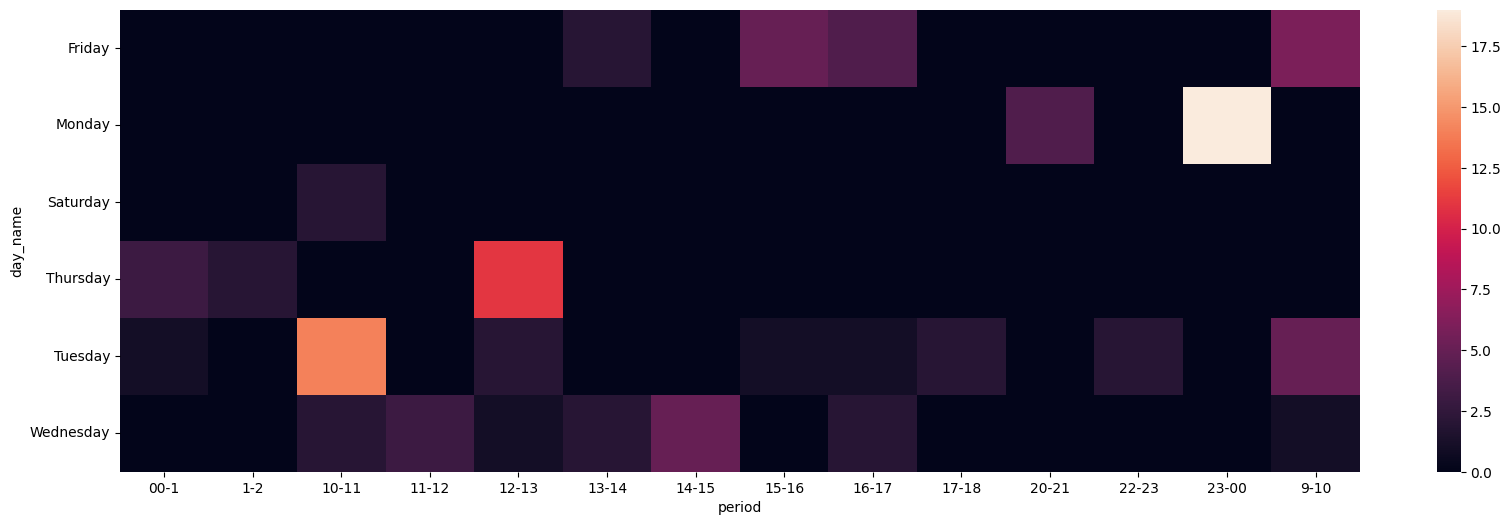

In [99]:
import seaborn as sns
plt.figure(figsize=(20,6))
pivot_table = df.pivot_table(index='day_name', columns='period', values='message', aggfunc='count').fillna(0)
sns.heatmap(pivot_table)
plt.yticks(rotation='horizontal')
plt.show()

In [100]:
df.pivot_table(index='day_name', columns='period', values='message', aggfunc='count').fillna(0)

period,00-1,1-2,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,20-21,22-23,23-00,9-10
day_name,,,,,,,,,,,,,,
Friday,0.0,0.0,0.0,0.0,0.0,2.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,6.0
Monday,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,19.0,0.0
Saturday,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Thursday,3.0,2.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tuesday,1.0,0.0,14.0,0.0,2.0,0.0,0.0,1.0,1.0,2.0,0.0,2.0,0.0,5.0
Wednesday,0.0,0.0,2.0,3.0,1.0,2.0,5.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0


In [107]:
!pip install wordcloud

In [108]:
from wordcloud import WordCloud

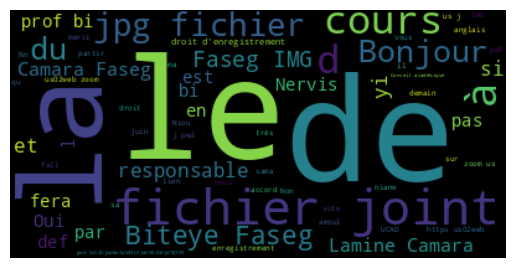

In [121]:
chemin_fichier = 'Discussion WhatsApp avec Master 2 Audit promo 2022.txt'

# Lire le contenu du fichier texte
with open('Discussion WhatsApp avec Master 2 Audit promo 2022.txt', 'r') as file:
    # Rest of your code here

    text = file.read()

# Créer le wordcloud
wordcloud = WordCloud().generate(text)

# Afficher le wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()